In [5]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import sys
import datetime

root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)
    

load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [6]:
from training.utils import date_range, df_to_X_y

df_test = pd.concat([
    pd.read_csv(f'../datasets/w{d.strftime("%Y-%m-%d")}.csv') for d in date_range(
        datetime.date(2020, 2, 3), 
        datetime.date(2020, 2, 25),
        datetime.timedelta(weeks=1),
    )
])

X_test, y_test = df_to_X_y(df_test)

X_test.shape, y_test.shape

((154929, 36), (154929, 4))

4842/4842 [==============================] - 5s 1ms/step


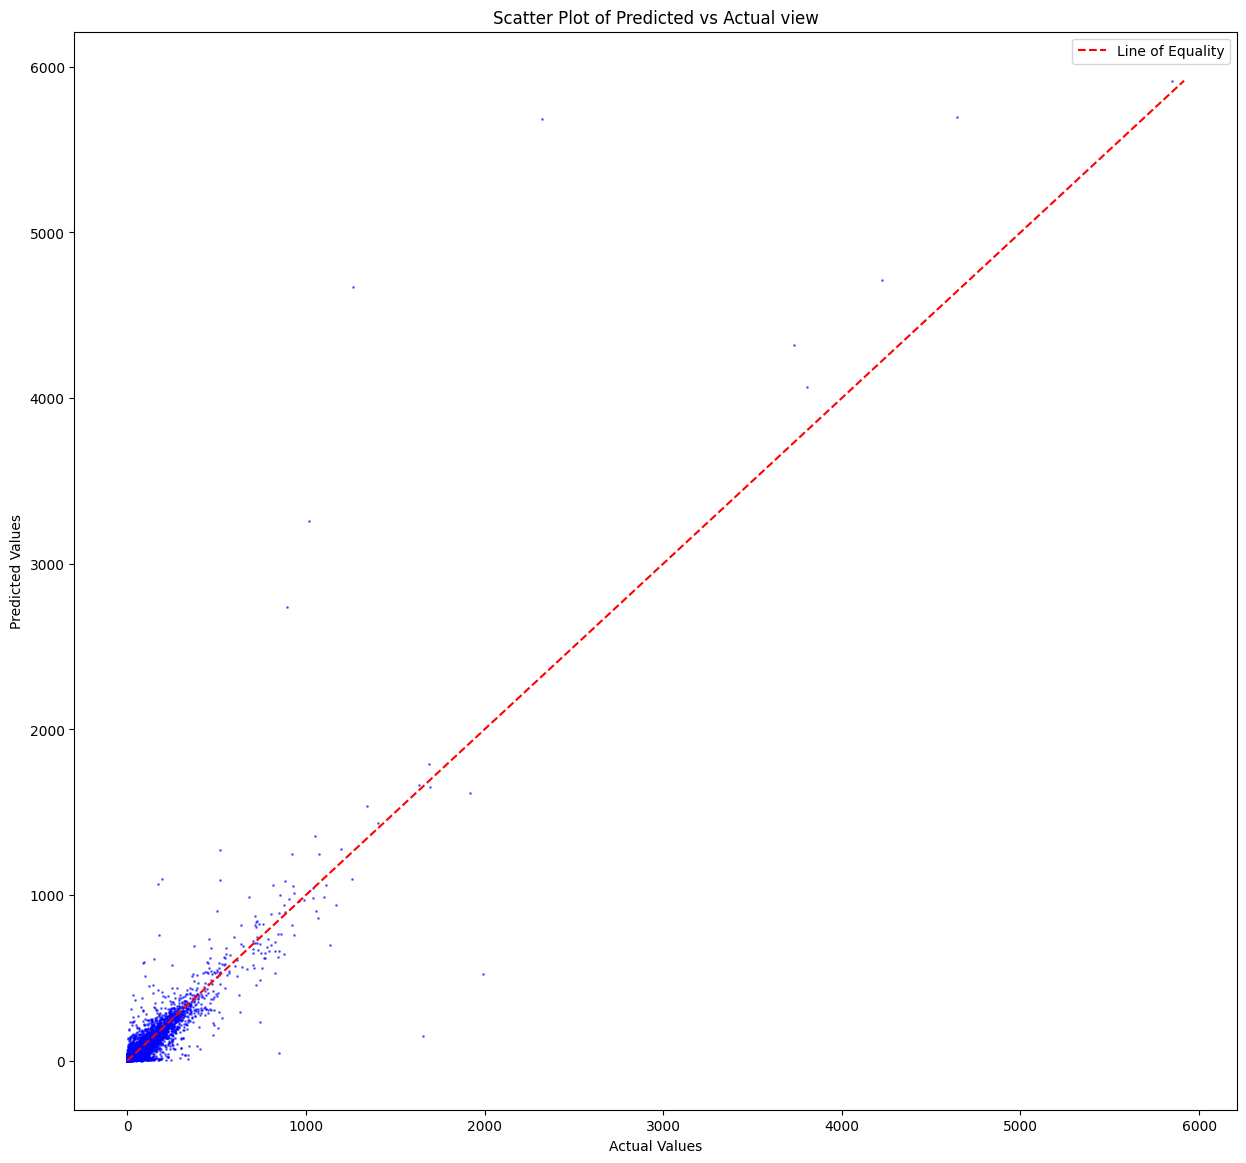

4842/4842 [==============================] - 5s 1ms/step


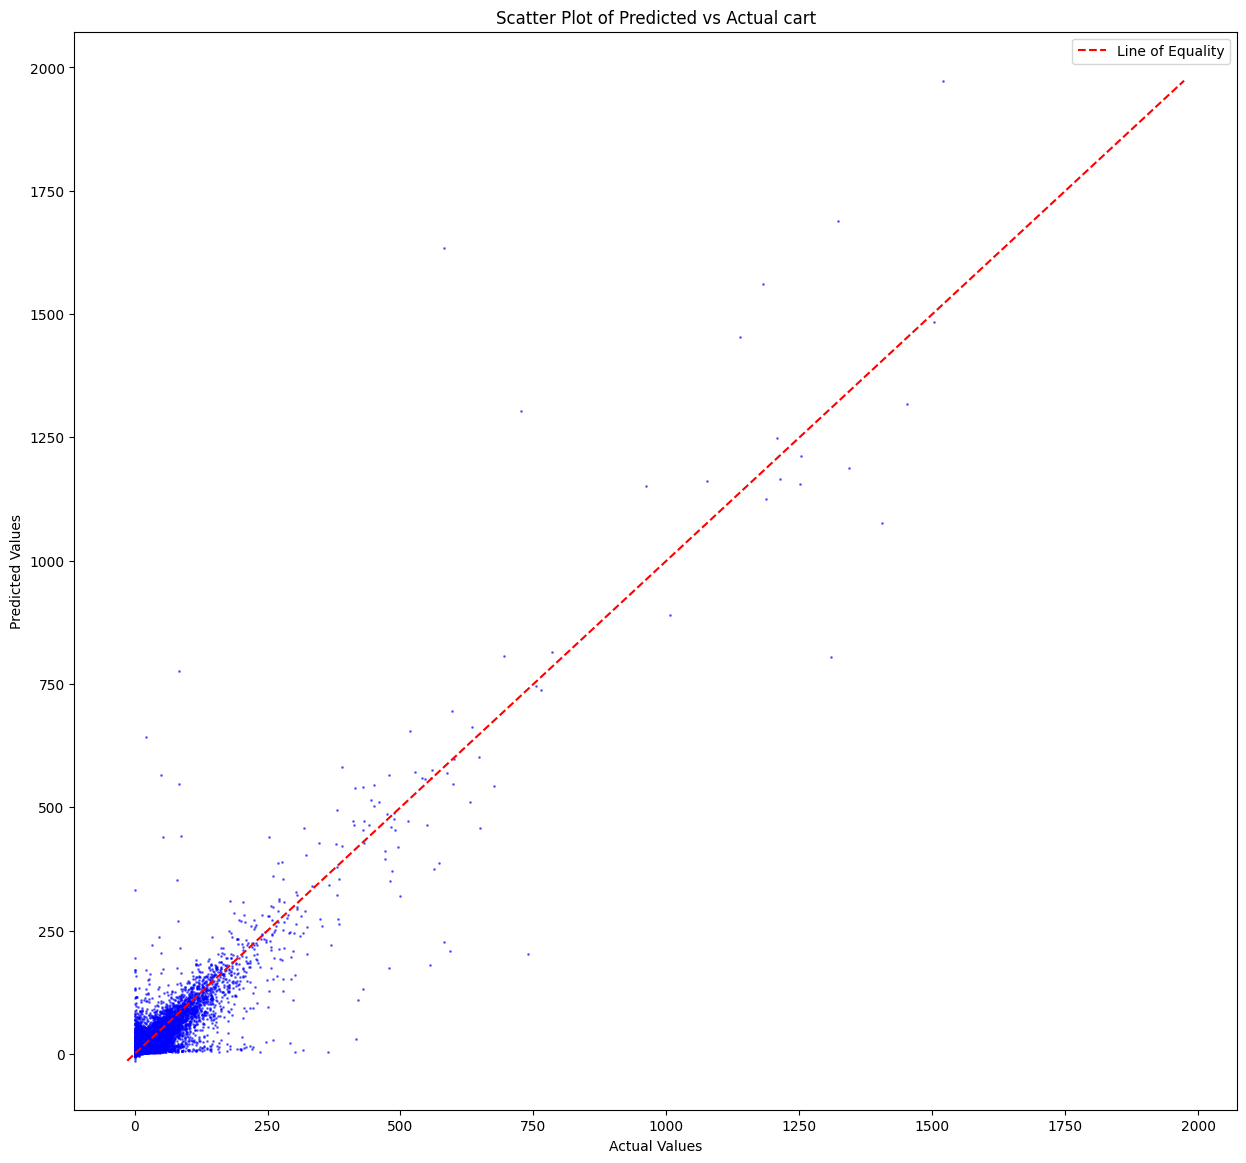

4842/4842 [==============================] - 6s 1ms/step


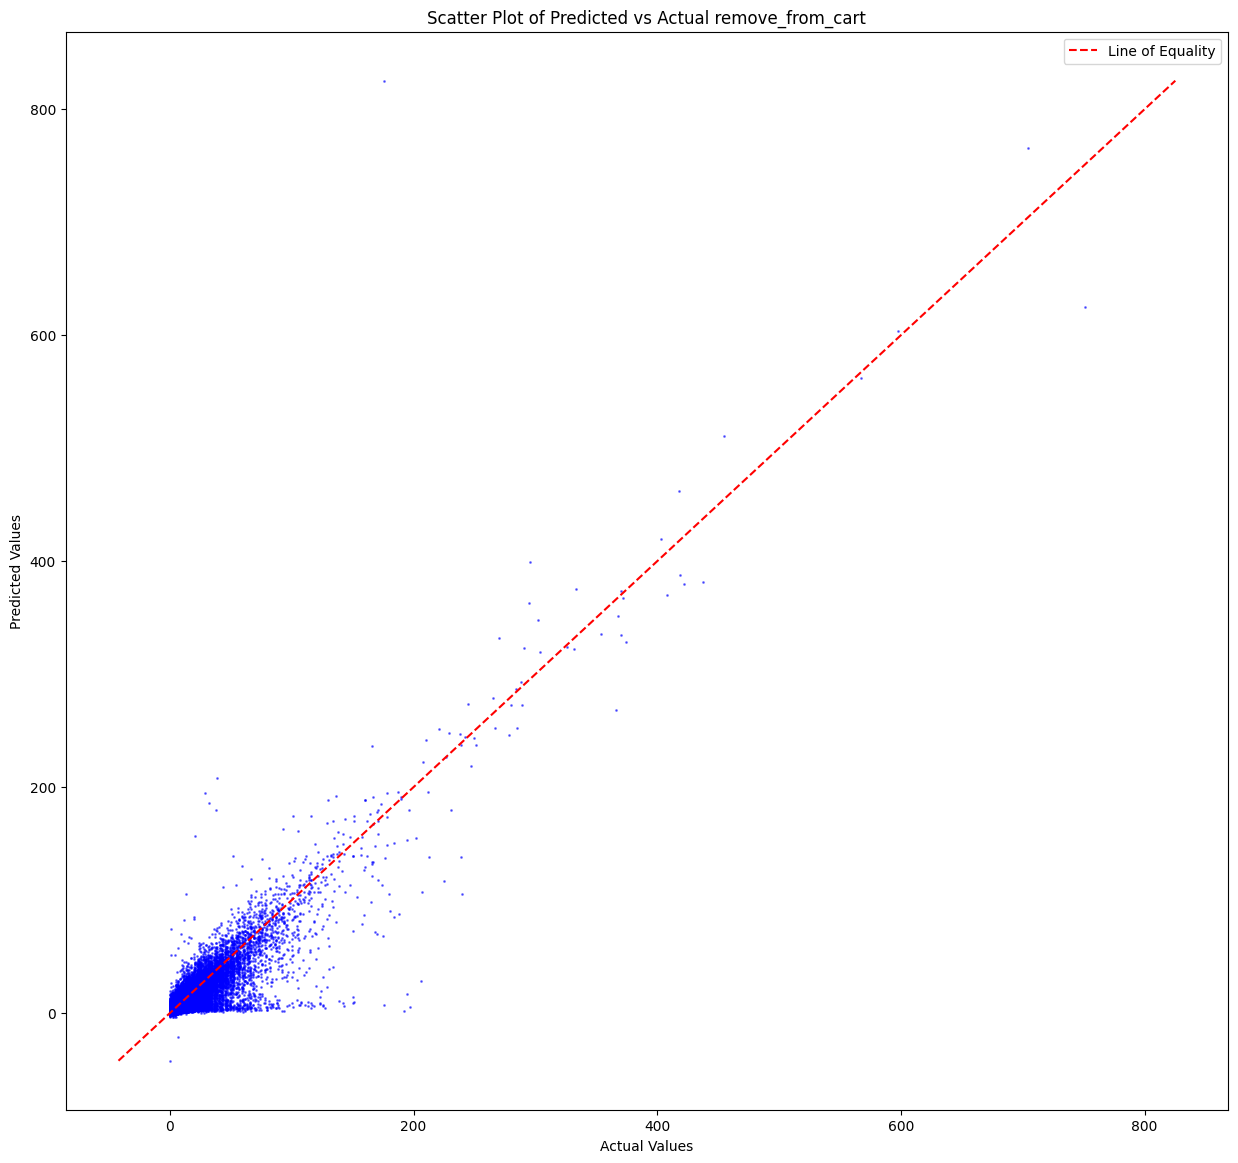

4842/4842 [==============================] - 6s 1ms/step


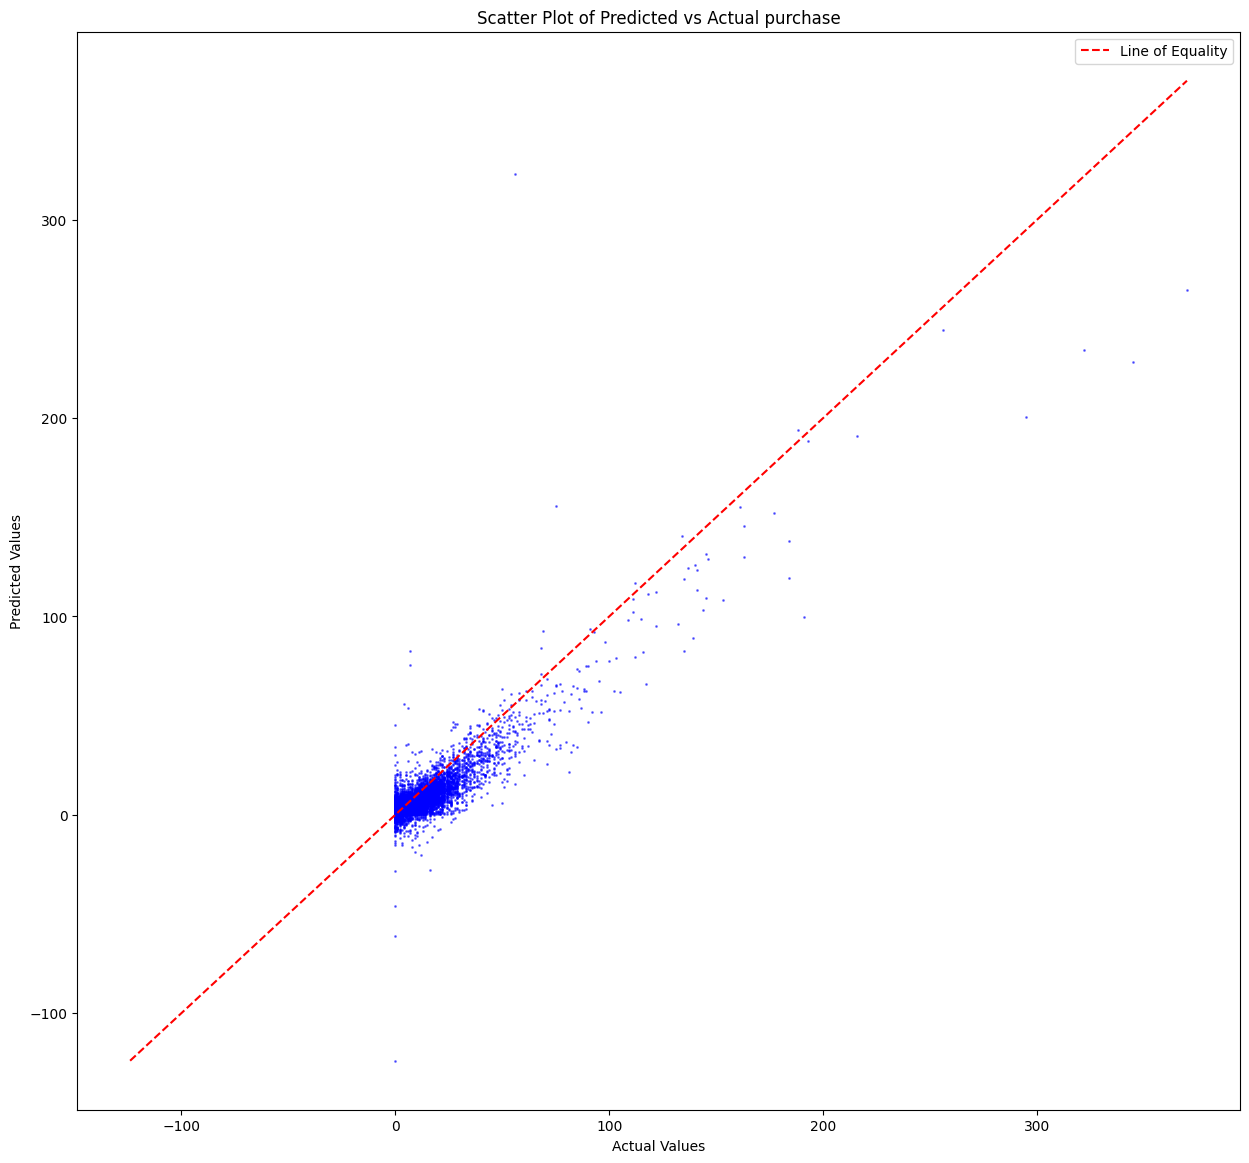

In [7]:
from keras.models import load_model

from training.utils import plot_accuracy


model_view = load_model('../model/saved/w-view.keras')
p_view = model_view.predict(X_test)
plot_accuracy(p_view[:, 0], y_test[:, 0], "view")

model_cart = load_model('../model/saved/w-cart.keras')
p_cart = model_cart.predict(X_test)
plot_accuracy(p_cart[:, 0], y_test[:, 1], "cart")

model_remove_from_cart = load_model('../model/saved/w-remove_from_cart.keras')
p_remove_from_cart = model_remove_from_cart.predict(X_test)
plot_accuracy(p_remove_from_cart[:, 0], y_test[:, 2], "remove_from_cart")

model_purchase = load_model('../model/saved/w-purchase.keras')
p_purchase = model_purchase.predict(X_test)
plot_accuracy(p_purchase[:, 0], y_test[:, 3], "purchase")

df = pd.DataFrame({ 
    'predicted_view': p_view[:, 0],
    'actual_view': y_test[:, 0],
    'predicted_cart': p_cart[:, 0],
    'actual_cart': y_test[:, 1],
    'predicted_remove_from_cart': p_remove_from_cart[:, 0],
    'actual_remove_from_cart': y_test[:, 2],
    'predicted_purchase': p_purchase[:, 0],
    'actual_purchase': y_test[:, 3],
})
df.to_csv('../.data/test/w-test.csv')

